In [17]:
import re
import numpy as np
from razdel import sentenize
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
subgraphs = np.load("../convert_text_to_subgraph/subgraphs.npy")
adjacency_table = np.load("../build_graph/adjacency_table.npy")

In [3]:
def get_union_graph(subgraph_1, subgraph_2):
    return subgraph_1 + subgraph_2

In [4]:
non_empty_ids = []
for i in range(len(subgraphs)):
    if subgraphs[i].sum() > 0:
        non_empty_ids.append(i)

In [5]:
union_graph = get_union_graph(subgraphs[2], subgraphs[3])

In [6]:
def separate_complementary_graph(subgraph, complementary_graph, adjacency_table):
    neighbour_nodes = []
    distant_nodes = []
    indices = np.arange(len(complementary_graph))
    subgraph_ids = indices[subgraph > 0]
    comp_graph_ids = indices[complementary_graph > 0]
    for idx in comp_graph_ids:
        if idx in subgraph_ids:
            neighbour_nodes.append(idx)
        else:
            is_neighbour = False
            for sub_idx in subgraph_ids:
                if (adjacency_table[idx, sub_idx] > 0 
                    or adjacency_table[sub_idx, idx] > 0):
                    is_neighbour = True
                    break
            if is_neighbour:
                neighbour_nodes.append(idx)
            else:
                distant_nodes.append(idx)
    return {"neighbour_nodes": neighbour_nodes, "distant_nodes": distant_nodes}


def compute_cohesion_gain(complementary_subgraph, separation):
    neighbour_cohesion = complementary_subgraph[separation["neighbour_nodes"]].sum()
    distant_cohesion = complementary_subgraph[separation["distant_nodes"]].sum()
    return neighbour_cohesion - distant_cohesion

In [7]:
gains = []
for i in range(len(subgraphs)-1):
    separation_1 = separate_complementary_graph(
        subgraph=subgraphs[i], 
        complementary_graph=subgraphs[i+1],
        adjacency_table=adjacency_table
    )
    cohesion_gain_1 = compute_cohesion_gain(
        complementary_subgraph=subgraphs[i+1],
        separation=separation_1
    )
    separation_2 = separate_complementary_graph(
        subgraph=subgraphs[i+1], 
        complementary_graph=subgraphs[i],
        adjacency_table=adjacency_table
    )
    cohesion_gain_2 = compute_cohesion_gain(
        complementary_subgraph=subgraphs[i],
        separation=separation_2
    )
    cohesion_gain = 0.5*(cohesion_gain_1+cohesion_gain_2)
    gains.append(cohesion_gain)
gains = np.array(gains)

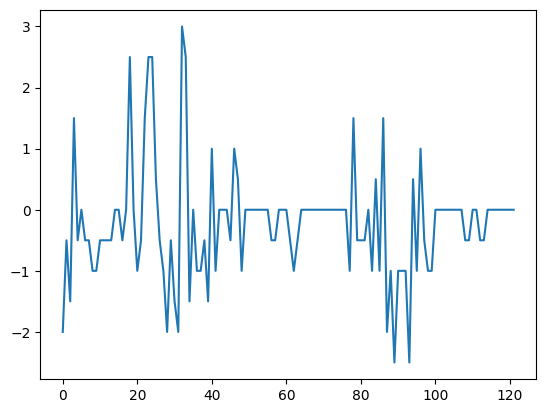

In [8]:
plt.plot(gains)

In [9]:
cs = []
for i in range(len(subgraphs)-1):
    cs.append(cosine_similarity(subgraphs[[i]], subgraphs[[i+1]])[0])

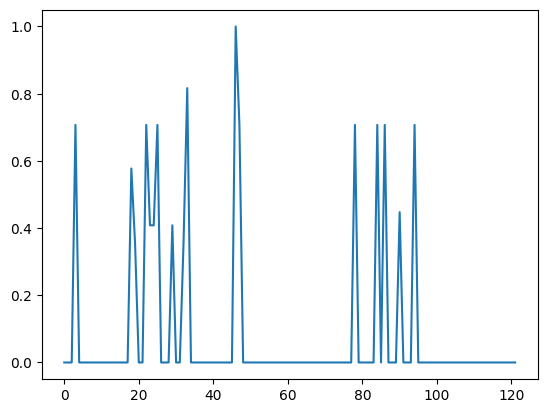

In [10]:
plt.plot(cs)

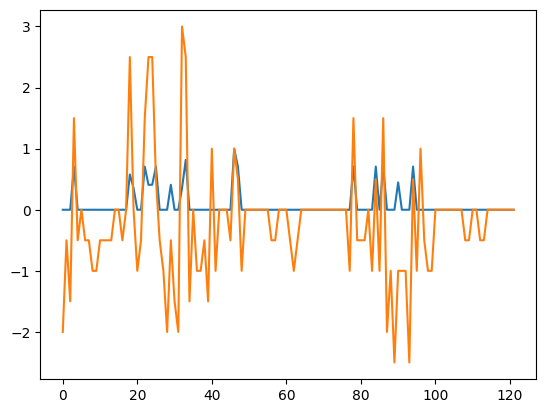

In [11]:
plt.plot(cs)
plt.plot(gains)

In [61]:
gains_nonzero = gains.copy()
gains_nonzero[gains_nonzero < 0] = 0

In [76]:
gains.mean(), gains.std()

(-0.22131147540983606, 0.9233962178362096)

In [80]:
gains.mean()-gains.std()

-1.1447076932460456

In [36]:
path_to_text = "../data/prnd_ru_txt/1003-13259.pdf"
with open(path_to_text, "r") as f:
    text = f.read()
sentences = []
for item in sentenize(text):
    sentence_prep = [x.strip() for x in item.text.split("\n") if len(x.strip()) > 0]
    sentence_prep = "\n".join(sentence_prep)
    sentences.append(sentence_prep)

In [73]:
gap_idx = 62
print(gains[gap_idx])
print()
print(sentences[gap_idx])
print()
print(sentences[gap_idx+1])

-1.0

[3,4]
5)  Контроль  численности  животных.

Многолетний  опыт  применения  авиаучета  лося
показал  его  достаточно  высокую  эффективность.


In [74]:
len(sentences), len(gains)

(123, 122)

In [ ]:
with open()

### Расчет depth-скоров

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
a = np.random.normal(size=100)

In [5]:
def compute_ds(a: np.ndarray, idx: int):
    if idx == 0:
        H_r = a[idx]
        r = idx
        while (r < len(a)-1 and a[r+1] >= H_r):
            H_r = a[r+1]
            r += 1
        depth_score = H_r - a[idx]
    elif idx == len(a)-1:
        H_l = a[idx]
        l = idx
        while (l > -1 and a[l-1] <= H_l):
            H_l = a[l-1]
            l -= 1
        depth_score = H_l - a[idx]
    else:
        H_r, H_l = a[idx], a[idx]
        l, r = idx, idx
        while (r < len(a)-1 and a[r+1] >= H_r):
            H_r = a[r+1]
            r += 1
        while (l > -1 and a[l-1] <= H_l):
            H_l = a[l-1]
            l -= 1
        depth_score = (H_r + H_l)/2 - a[idx]
    return depth_score

depth_scores = list()
for idx, _ in enumerate(a):
    ds = compute_ds(a, idx)
    depth_scores.append(ds)

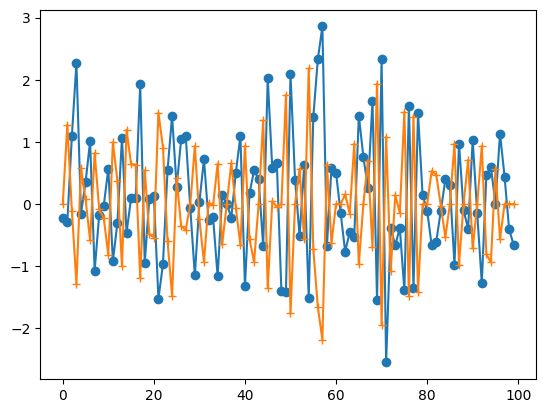

In [8]:
plt.plot(a, marker='o')
plt.plot(depth_scores, marker='+')

### Анализ результатов

In [1]:
import os

In [31]:
scores = dict()

for item in os.listdir("./results"):
    filepath = os.path.join("./results", item)
    filename = os.path.basename(filepath)
    with open(filepath, "r") as f:
        s = f.readlines()[0]
        s = s.split(", ")
        Pk = float(s[0].split(": ")[1])
        WinDiff = float(s[1].split(": ")[1])
        scores[filename] = {
            "Pk": Pk, "WinDiff": WinDiff
        }

Pk_best = sorted(scores.items(), key=lambda x: x[1]["Pk"])
# Pk_best = {item[0]: item[1] for item in Pk_best}

WinDiff_best = sorted(scores.items(), key=lambda x: x[1]["WinDiff"])
# WinDiff_best = {item[0]: item[1] for item in WinDiff_best}

In [33]:
# Pk_best[:10], WinDiff_best[:10]
WinDiff_best[:10]

[('9.txt', {'Pk': 0.43661971830985913, 'WinDiff': 0.49295774647887325}),
 ('46.txt', {'Pk': 0.49295774647887325, 'WinDiff': 0.5070422535211268}),
 ('48.txt', {'Pk': 0.4927536231884058, 'WinDiff': 0.5217391304347826}),
 ('10.txt', {'Pk': 0.5217391304347826, 'WinDiff': 0.5217391304347826}),
 ('4.txt', {'Pk': 0.5217391304347826, 'WinDiff': 0.5217391304347826}),
 ('12.txt', {'Pk': 0.4852941176470588, 'WinDiff': 0.5294117647058824}),
 ('2.txt', {'Pk': 0.49295774647887325, 'WinDiff': 0.5352112676056338}),
 ('8.txt', {'Pk': 0.5285714285714286, 'WinDiff': 0.5428571428571428}),
 ('47.txt', {'Pk': 0.5211267605633803, 'WinDiff': 0.5492957746478874}),
 ('51.txt', {'Pk': 0.5588235294117647, 'WinDiff': 0.5588235294117647})]

In [34]:
# Pk_best[-10:][::-1], WinDiff_best[-10:][::-1]
WinDiff_best[-10:][::-1]

[('41.txt', {'Pk': 0.6029411764705882, 'WinDiff': 0.7205882352941176}),
 ('21.txt', {'Pk': 0.6323529411764706, 'WinDiff': 0.6911764705882353}),
 ('25.txt', {'Pk': 0.647887323943662, 'WinDiff': 0.6901408450704225}),
 ('31.txt', {'Pk': 0.5714285714285714, 'WinDiff': 0.6857142857142857}),
 ('18.txt', {'Pk': 0.6285714285714286, 'WinDiff': 0.6857142857142857}),
 ('36.txt', {'Pk': 0.5217391304347826, 'WinDiff': 0.6811594202898551}),
 ('14.txt', {'Pk': 0.6231884057971014, 'WinDiff': 0.6811594202898551}),
 ('17.txt', {'Pk': 0.5362318840579711, 'WinDiff': 0.6811594202898551}),
 ('27.txt', {'Pk': 0.5588235294117647, 'WinDiff': 0.6764705882352942}),
 ('50.txt', {'Pk': 0.6470588235294118, 'WinDiff': 0.6764705882352942})]